In [156]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import arff
import urllib.request
import io
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

## Method 1: Loading Dataset

In [26]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00327/Training%20Dataset.arff'
response = urllib.request.urlopen(url)
# data = response.read().decode('utf-8')

dataset, meta = arff.loadarff(io.StringIO(response.read().decode('utf-8')))

In [467]:
type(dataset)

numpy.ndarray

In [23]:
dataset = pd.DataFrame(dataset)

In [24]:
dataset

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,b'-1',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'-1',b'1',...,b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'1',b'1',b'-1',b'-1'
1,b'1',b'1',b'1',b'1',b'1',b'-1',b'0',b'1',b'-1',b'1',...,b'1',b'1',b'-1',b'-1',b'0',b'-1',b'1',b'1',b'1',b'-1'
2,b'1',b'0',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'1',...,b'1',b'1',b'1',b'-1',b'1',b'-1',b'1',b'0',b'-1',b'-1'
3,b'1',b'0',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'1',b'1',...,b'1',b'1',b'-1',b'-1',b'1',b'-1',b'1',b'-1',b'1',b'-1'
4,b'1',b'0',b'-1',b'1',b'1',b'-1',b'1',b'1',b'-1',b'1',...,b'-1',b'1',b'-1',b'-1',b'0',b'-1',b'1',b'1',b'1',b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,b'1',b'-1',b'1',b'-1',b'1',b'1',b'1',b'1',b'-1',b'-1',...,b'-1',b'-1',b'1',b'1',b'-1',b'-1',b'1',b'1',b'1',b'1'
11051,b'-1',b'1',b'1',b'-1',b'-1',b'-1',b'1',b'-1',b'-1',b'-1',...,b'-1',b'1',b'1',b'1',b'1',b'1',b'1',b'-1',b'1',b'-1'
11052,b'1',b'-1',b'1',b'1',b'1',b'-1',b'1',b'-1',b'-1',b'1',...,b'1',b'1',b'1',b'1',b'1',b'-1',b'1',b'0',b'1',b'-1'
11053,b'-1',b'-1',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'1',b'-1',...,b'-1',b'1',b'1',b'1',b'1',b'-1',b'1',b'1',b'1',b'-1'


## Method 2: Loading Dataset

In [34]:
data = arff.loadarff('Training_Dataset.arff')

In [35]:
df = pd.DataFrame(data[0])

In [37]:
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,b'-1',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'-1',b'1',...,b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'1',b'1',b'-1',b'-1'
1,b'1',b'1',b'1',b'1',b'1',b'-1',b'0',b'1',b'-1',b'1',...,b'1',b'1',b'-1',b'-1',b'0',b'-1',b'1',b'1',b'1',b'-1'
2,b'1',b'0',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'1',...,b'1',b'1',b'1',b'-1',b'1',b'-1',b'1',b'0',b'-1',b'-1'
3,b'1',b'0',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'1',b'1',...,b'1',b'1',b'-1',b'-1',b'1',b'-1',b'1',b'-1',b'1',b'-1'
4,b'1',b'0',b'-1',b'1',b'1',b'-1',b'1',b'1',b'-1',b'1',...,b'-1',b'1',b'-1',b'-1',b'0',b'-1',b'1',b'1',b'1',b'1'


### Categorical Features

In [468]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
len(numerical_features)

31

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   having_IP_Address            11055 non-null  object
 1   URL_Length                   11055 non-null  object
 2   Shortining_Service           11055 non-null  object
 3   having_At_Symbol             11055 non-null  object
 4   double_slash_redirecting     11055 non-null  object
 5   Prefix_Suffix                11055 non-null  object
 6   having_Sub_Domain            11055 non-null  object
 7   SSLfinal_State               11055 non-null  object
 8   Domain_registeration_length  11055 non-null  object
 9   Favicon                      11055 non-null  object
 10  port                         11055 non-null  object
 11  HTTPS_token                  11055 non-null  object
 12  Request_URL                  11055 non-null  object
 13  URL_of_Anchor                11

## Count of different categories in all features

In [121]:
for feature in df.columns:
    print(f'{feature}: {df[feature].value_counts()}')

having_IP_Address: b'1'     7262
b'-1'    3793
Name: having_IP_Address, dtype: int64
URL_Length: b'-1'    8960
b'1'     1960
b'0'      135
Name: URL_Length, dtype: int64
Shortining_Service: b'1'     9611
b'-1'    1444
Name: Shortining_Service, dtype: int64
having_At_Symbol: b'1'     9400
b'-1'    1655
Name: having_At_Symbol, dtype: int64
double_slash_redirecting: b'1'     9626
b'-1'    1429
Name: double_slash_redirecting, dtype: int64
Prefix_Suffix: b'-1'    9590
b'1'     1465
Name: Prefix_Suffix, dtype: int64
having_Sub_Domain: b'1'     4070
b'0'     3622
b'-1'    3363
Name: having_Sub_Domain, dtype: int64
SSLfinal_State: b'1'     6331
b'-1'    3557
b'0'     1167
Name: SSLfinal_State, dtype: int64
Domain_registeration_length: b'-1'    7389
b'1'     3666
Name: Domain_registeration_length, dtype: int64
Favicon: b'1'     9002
b'-1'    2053
Name: Favicon, dtype: int64
port: b'1'     9553
b'-1'    1502
Name: port, dtype: int64
HTTPS_token: b'1'     9259
b'-1'    1796
Name: HTTPS_token, dty

## Features with null values

In [66]:
features_with_nan = [feature for feature in df.columns if df[feature].isnull().sum() > 1]

In [67]:
features_with_nan

[]

In [73]:
df.head(10)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,b'-1',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'-1',b'1',...,b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'1',b'1',b'-1',b'-1'
1,b'1',b'1',b'1',b'1',b'1',b'-1',b'0',b'1',b'-1',b'1',...,b'1',b'1',b'-1',b'-1',b'0',b'-1',b'1',b'1',b'1',b'-1'
2,b'1',b'0',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'1',...,b'1',b'1',b'1',b'-1',b'1',b'-1',b'1',b'0',b'-1',b'-1'
3,b'1',b'0',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'1',b'1',...,b'1',b'1',b'-1',b'-1',b'1',b'-1',b'1',b'-1',b'1',b'-1'
4,b'1',b'0',b'-1',b'1',b'1',b'-1',b'1',b'1',b'-1',b'1',...,b'-1',b'1',b'-1',b'-1',b'0',b'-1',b'1',b'1',b'1',b'1'
5,b'-1',b'0',b'-1',b'1',b'-1',b'-1',b'1',b'1',b'-1',b'1',...,b'1',b'1',b'1',b'1',b'1',b'-1',b'1',b'-1',b'-1',b'1'
6,b'1',b'0',b'-1',b'1',b'1',b'-1',b'-1',b'-1',b'1',b'1',...,b'1',b'1',b'1',b'-1',b'-1',b'-1',b'1',b'0',b'-1',b'-1'
7,b'1',b'0',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'1',b'1',...,b'1',b'1',b'-1',b'-1',b'0',b'-1',b'1',b'0',b'1',b'-1'
8,b'1',b'0',b'-1',b'1',b'1',b'-1',b'1',b'1',b'-1',b'1',...,b'1',b'1',b'1',b'-1',b'1',b'1',b'1',b'0',b'1',b'1'
9,b'1',b'1',b'-1',b'1',b'1',b'-1',b'-1',b'1',b'-1',b'1',...,b'1',b'1',b'1',b'-1',b'0',b'-1',b'1',b'0',b'1',b'-1'


# Bar Plot to check the relationship between dependent and independent variables

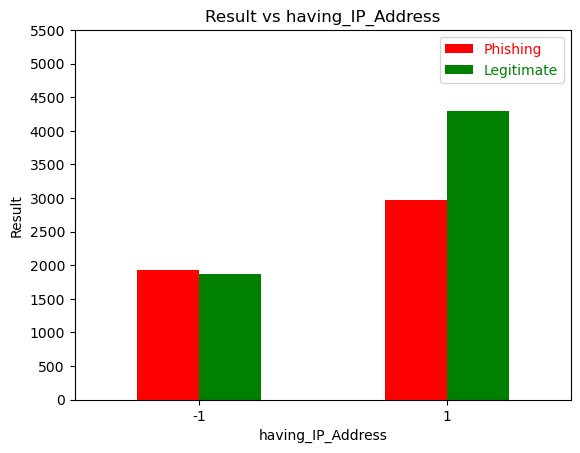

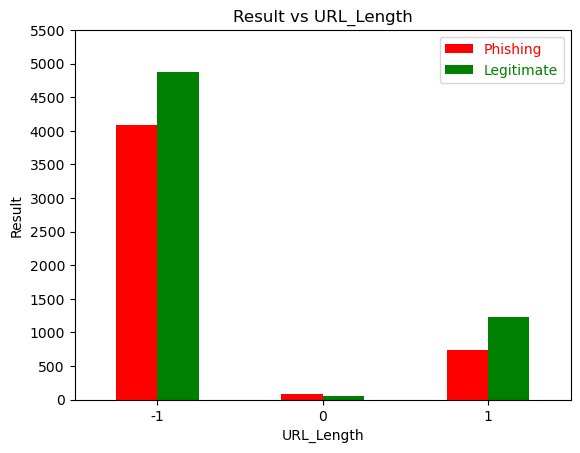

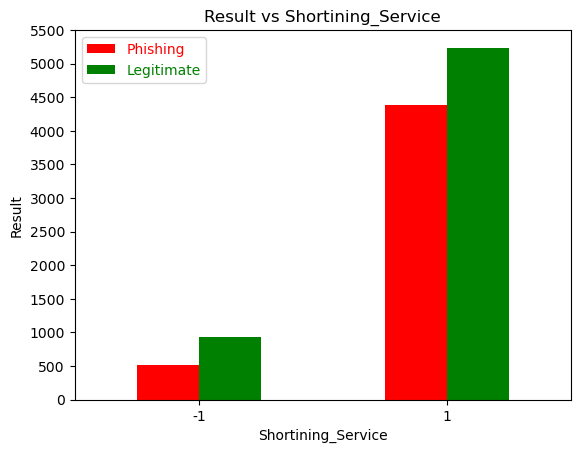

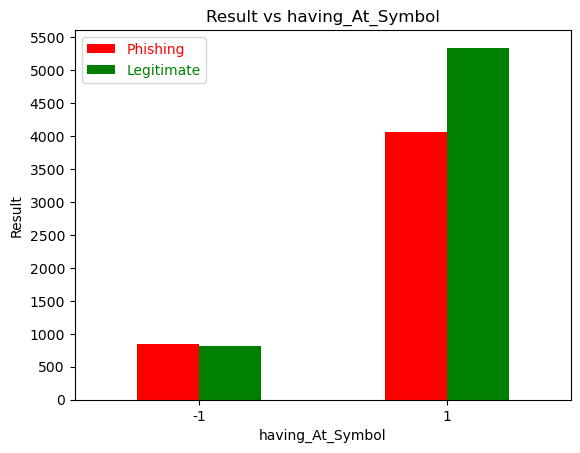

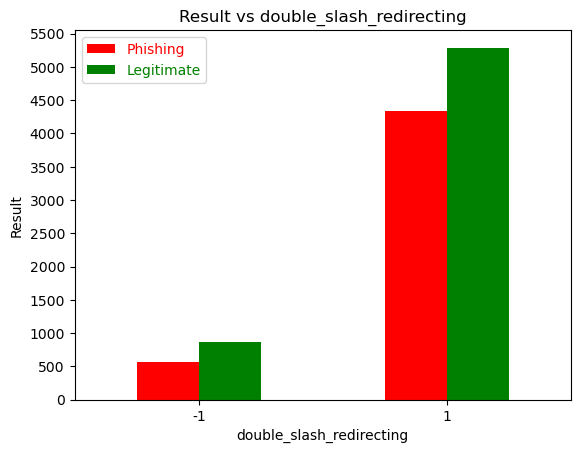

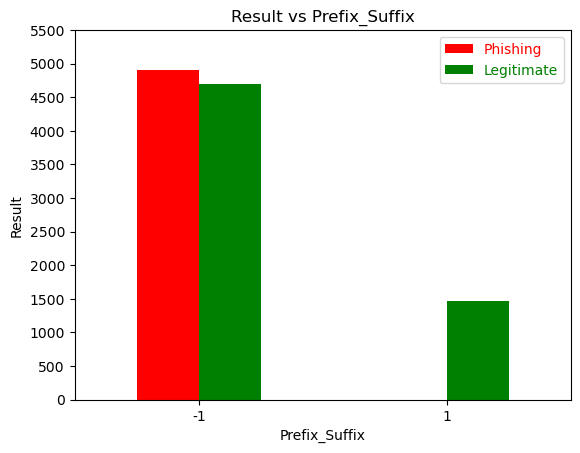

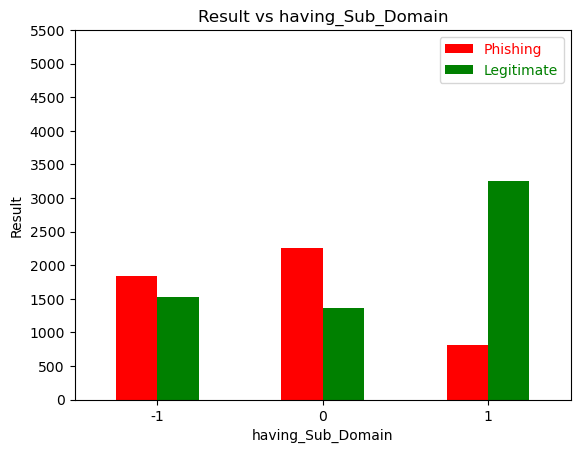

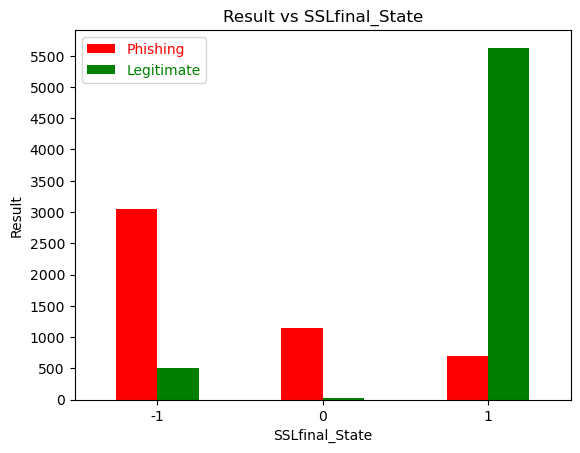

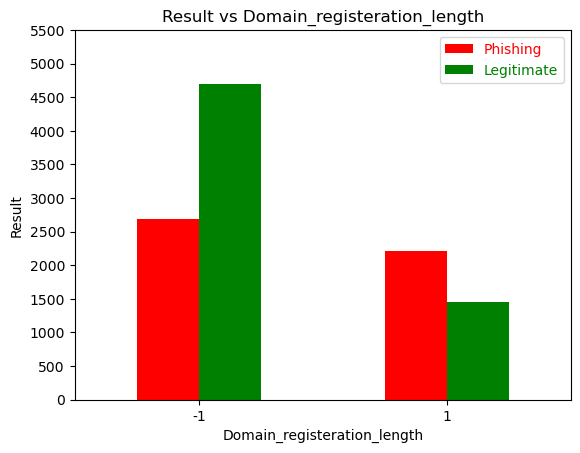

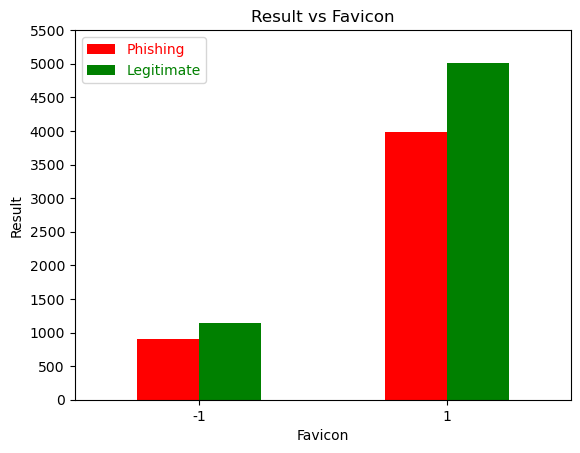

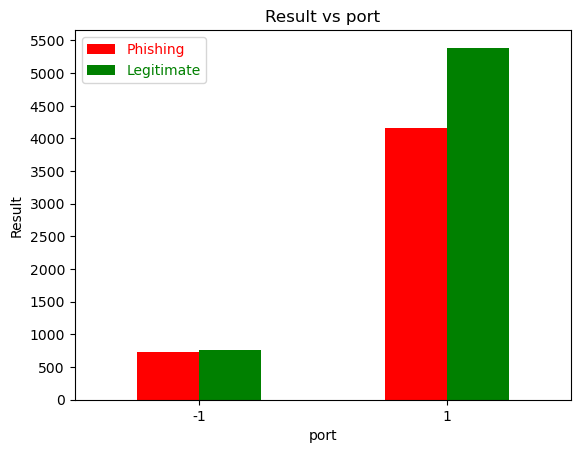

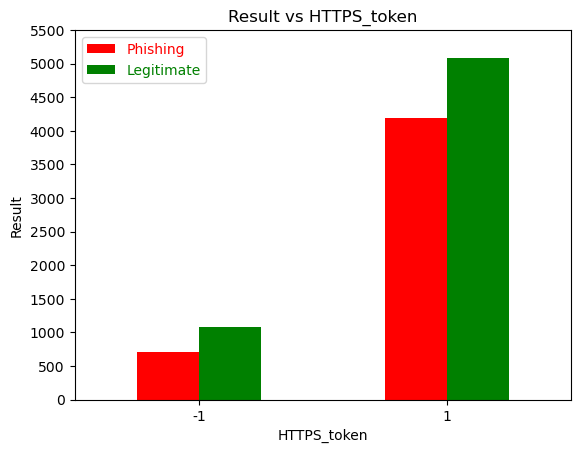

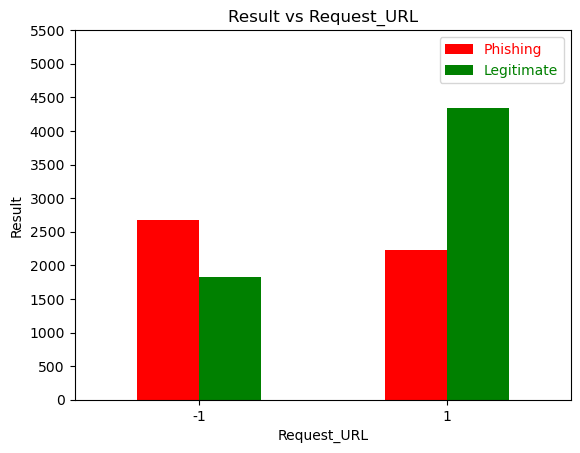

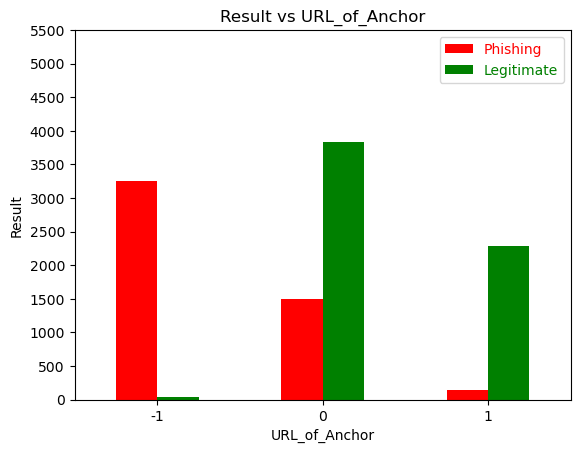

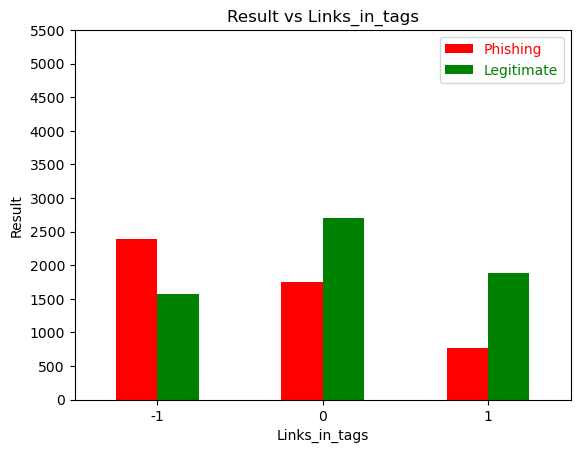

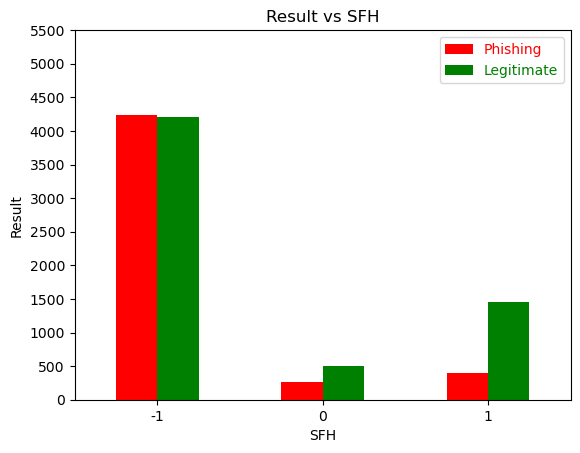

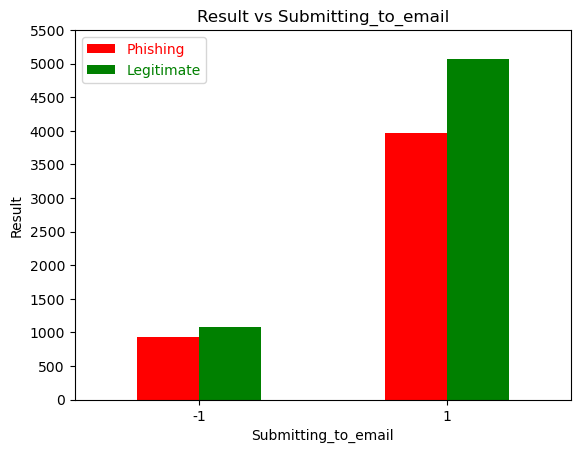

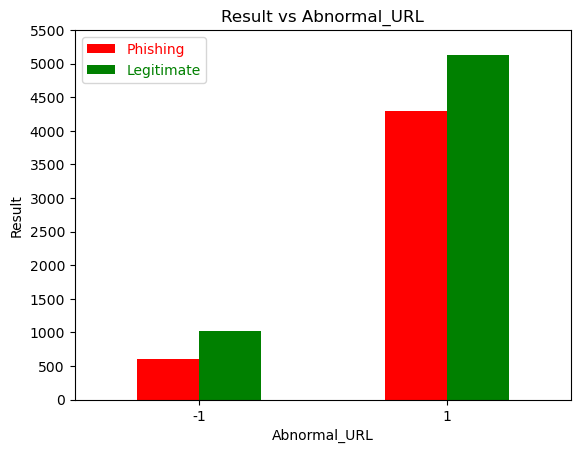

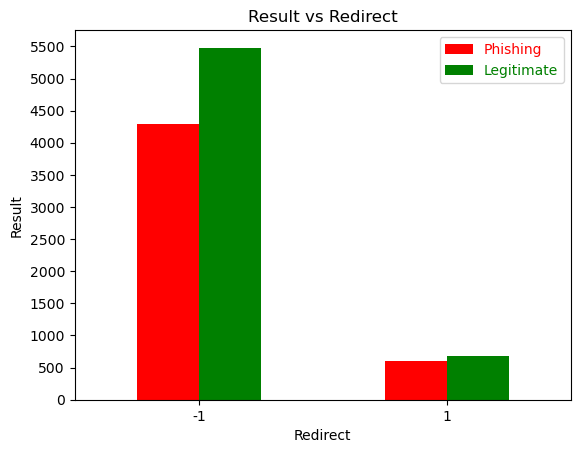

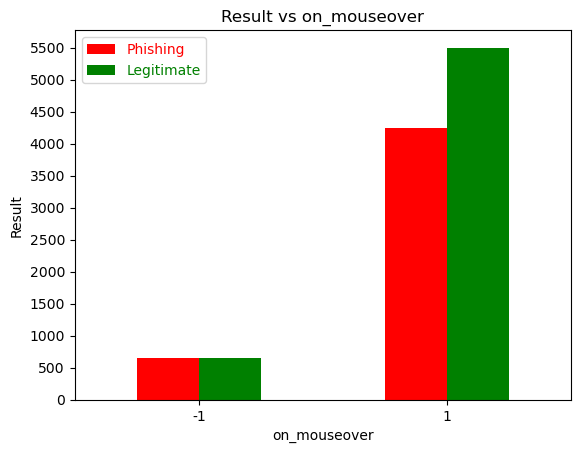

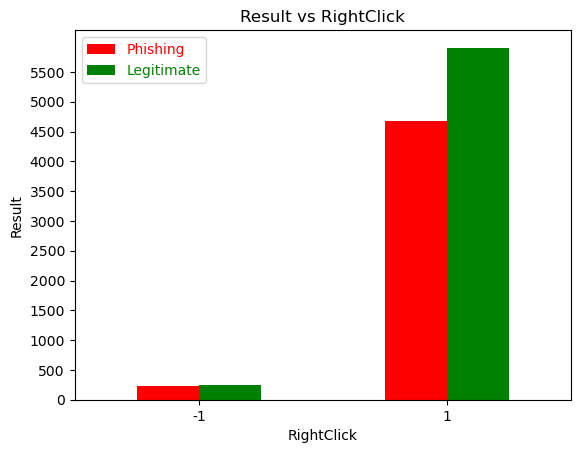

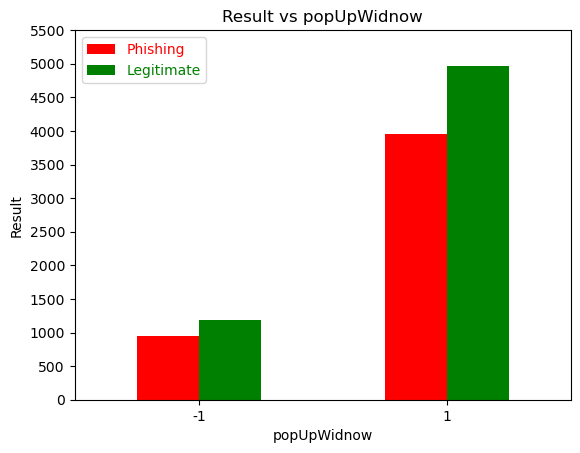

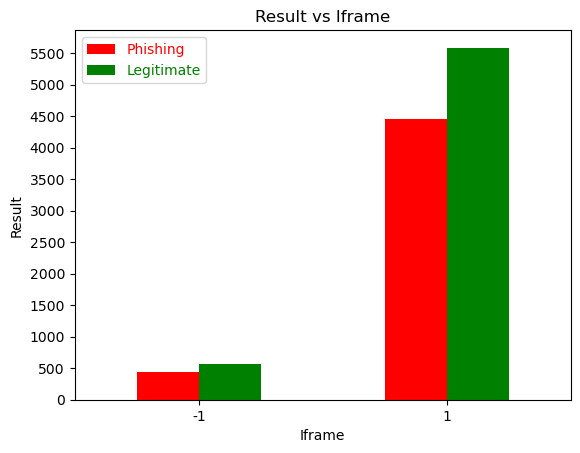

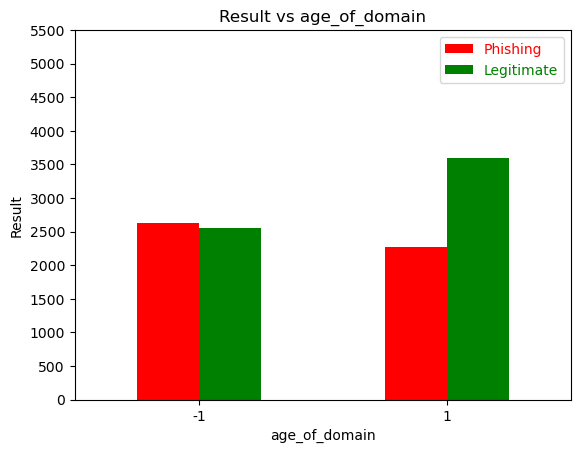

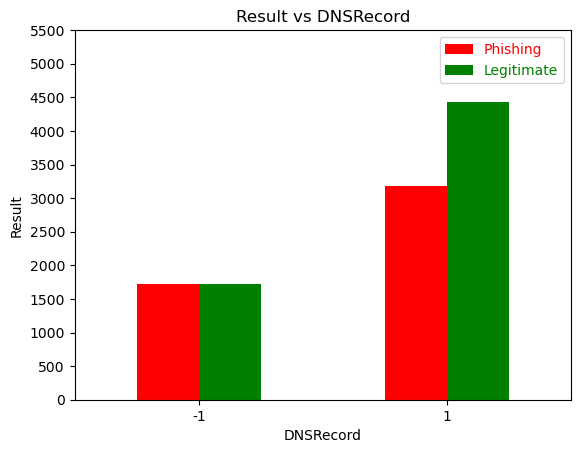

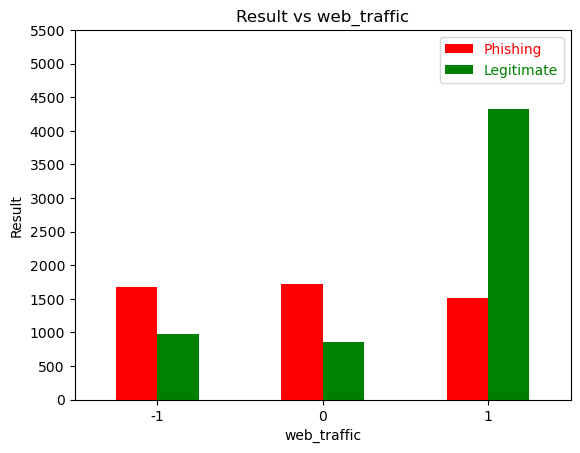

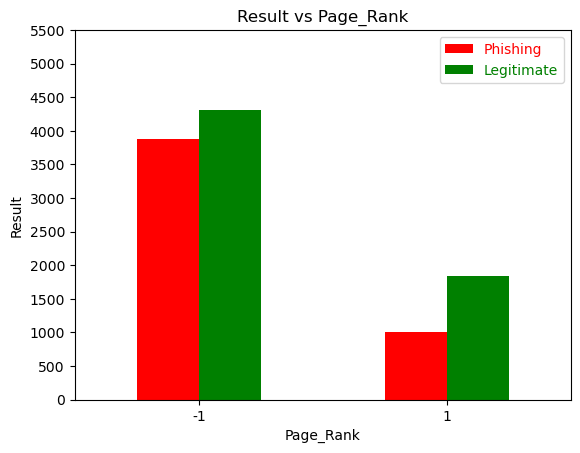

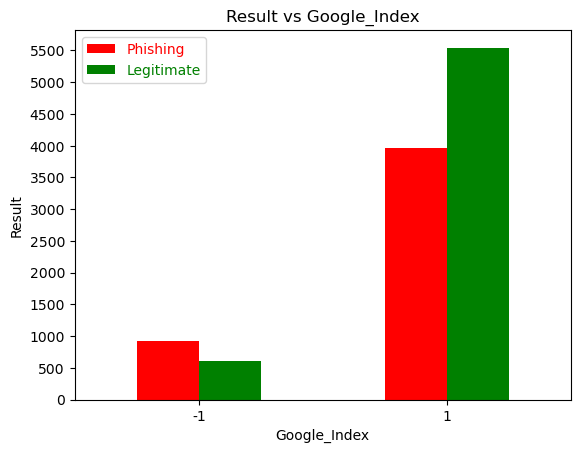

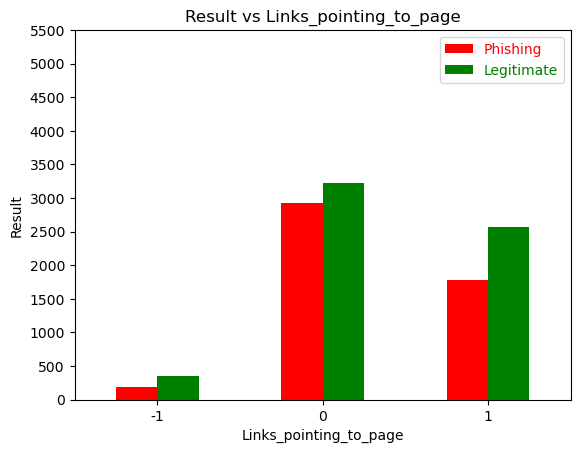

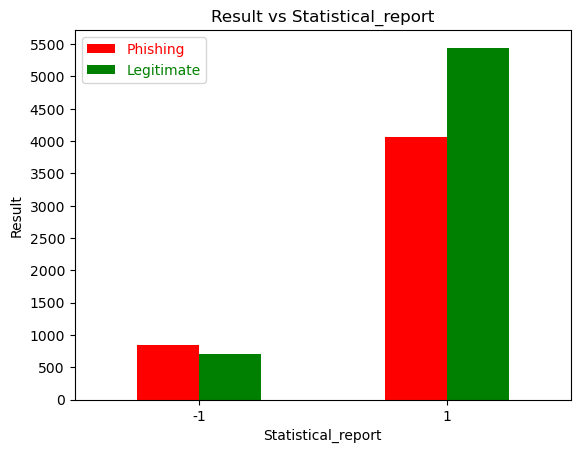

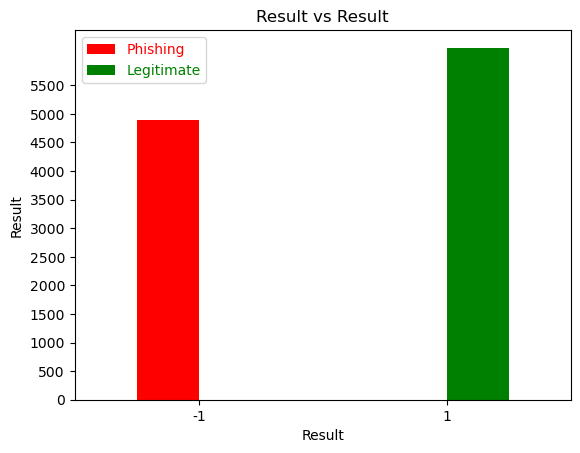

In [120]:
for feature in df.columns:
    data = df.copy()
    temp = pd.crosstab(index = data[feature], columns = data['Result'])
    temp.plot.bar(color=['red','green'])
    if df[feature].value_counts().shape[0] == 2:
        xticks = [0,1]
        xtick_labels = ['-1', '1']
    else:
        xticks = [0,1,2]
        xtick_labels = ['-1', '0', '1']
    plt.xlabel(feature)
    plt.ylabel('Result')
    plt.legend(['Phishing', 'Legitimate'], labelcolor=['red', 'green'])
    plt.title(f'Result vs {feature}')
    plt.xticks(ticks=xticks, labels=xtick_labels, rotation=0)
    plt.yticks(ticks=np.arange(0,6000,500))
    plt.show()

## Cardinality of Categorical features

In [123]:
# Cardinality
for feature in df.columns:
    print(f'The feature is {feature} and number of categories are {len(df[feature].unique())}')


The feature is having_IP_Address and number of categories are 2
The feature is URL_Length and number of categories are 3
The feature is Shortining_Service and number of categories are 2
The feature is having_At_Symbol and number of categories are 2
The feature is double_slash_redirecting and number of categories are 2
The feature is Prefix_Suffix and number of categories are 2
The feature is having_Sub_Domain and number of categories are 3
The feature is SSLfinal_State and number of categories are 3
The feature is Domain_registeration_length and number of categories are 2
The feature is Favicon and number of categories are 2
The feature is port and number of categories are 2
The feature is HTTPS_token and number of categories are 2
The feature is Request_URL and number of categories are 2
The feature is URL_of_Anchor and number of categories are 3
The feature is Links_in_tags and number of categories are 3
The feature is SFH and number of categories are 3
The feature is Submitting_to_e

In [128]:
# changing the type of all columns to int to convert them into discrete features
for feature in df.columns:
    df[feature] = df[feature].astype(int)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int32
 1   URL_Length                   11055 non-null  int32
 2   Shortining_Service           11055 non-null  int32
 3   having_At_Symbol             11055 non-null  int32
 4   double_slash_redirecting     11055 non-null  int32
 5   Prefix_Suffix                11055 non-null  int32
 6   having_Sub_Domain            11055 non-null  int32
 7   SSLfinal_State               11055 non-null  int32
 8   Domain_registeration_length  11055 non-null  int32
 9   Favicon                      11055 non-null  int32
 10  port                         11055 non-null  int32
 11  HTTPS_token                  11055 non-null  int32
 12  Request_URL                  11055 non-null  int32
 13  URL_of_Anchor                11055 non-null  i

# Feature Selection

In [136]:
## Train Test Split

In [186]:
X_train, X_test, y_train, y_Test = train_test_split(df, df[['Result']], test_size=0.2, random_state=0)

In [189]:
feature_selecting_model = SelectFromModel(Lasso(alpha=0.001, random_state=0))

In [190]:
X_train = X_train.drop(columns=['Result'])

In [191]:

y_train

,Result
5033,1
10307,-1
7563,-1
5911,-1
9823,1
...,...
4859,1
3264,-1
9845,1
10799,-1


In [293]:
feature_selecting_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.001, random_state=0))

In [294]:
feature_selecting_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True])

In [295]:
features_selected = X_train.columns[(feature_selecting_model.get_support())]

In [296]:
features_selected

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report'],
      dtype='object')

In [297]:
X_train = X_train[features_selected]

In [301]:
X_train

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,Redirect,on_mouseover,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
5033,1,-1,1,1,1,1,-1,1,-1,1,...,0,1,1,1,-1,1,1,1,1,1
10307,1,1,1,-1,1,-1,0,0,-1,-1,...,0,1,1,1,1,0,1,1,0,1
7563,-1,-1,1,1,1,-1,0,0,1,1,...,0,1,1,-1,1,-1,-1,1,1,-1
5911,1,-1,1,1,1,-1,0,-1,1,1,...,0,1,1,-1,1,-1,-1,1,0,1
9823,1,-1,1,1,1,1,1,1,-1,1,...,0,1,1,1,1,1,-1,1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,1,-1,1,1,1,-1,1,1,-1,1,...,0,1,1,1,-1,-1,-1,1,1,1
3264,1,-1,1,1,1,-1,-1,-1,1,1,...,0,1,1,1,-1,1,-1,-1,1,1
9845,-1,1,1,1,1,-1,1,1,-1,1,...,0,1,1,1,1,0,1,1,1,1
10799,-1,-1,1,1,1,-1,-1,0,-1,1,...,0,1,1,1,1,0,-1,1,1,1


In [ ]:
X_test = X_test.drop(columns=['Result'])

In [299]:
X_test = X_test[features_selected]

In [300]:
X_test

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,Redirect,on_mouseover,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
226,1,-1,1,1,1,-1,-1,1,1,-1,...,0,1,1,-1,-1,-1,-1,1,0,1
2252,1,-1,1,1,1,-1,0,-1,-1,1,...,0,1,1,-1,1,-1,-1,1,0,1
2646,1,-1,1,1,1,-1,0,1,-1,1,...,0,1,1,1,-1,1,-1,1,1,1
6444,1,-1,1,1,1,-1,0,-1,-1,1,...,1,1,1,-1,1,1,-1,1,0,1
1387,1,-1,1,1,1,-1,0,1,-1,1,...,0,1,1,-1,-1,1,-1,1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5831,-1,-1,1,1,1,-1,0,1,1,1,...,0,1,1,-1,1,-1,-1,1,1,1
8541,-1,-1,1,-1,1,-1,-1,-1,1,1,...,0,1,1,1,1,1,-1,1,1,1
6810,-1,-1,1,-1,1,-1,1,-1,-1,-1,...,0,-1,-1,-1,1,0,-1,1,1,1
4721,1,-1,1,1,1,-1,0,-1,-1,1,...,0,1,1,1,1,1,-1,1,0,1


In [198]:
y_Test

,Result
226,-1
2252,-1
2646,-1
6444,-1
1387,1
...,...
5831,1
8541,-1
6810,1
4721,1


## Pie Plot for all variables

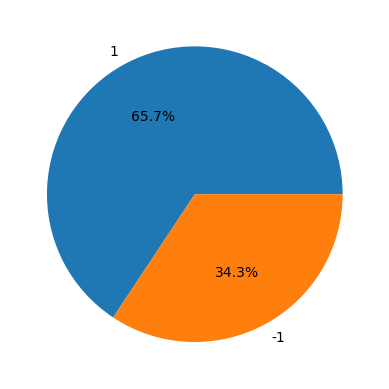

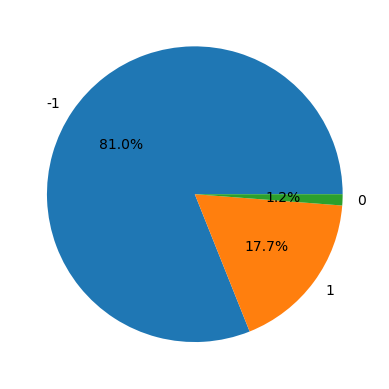

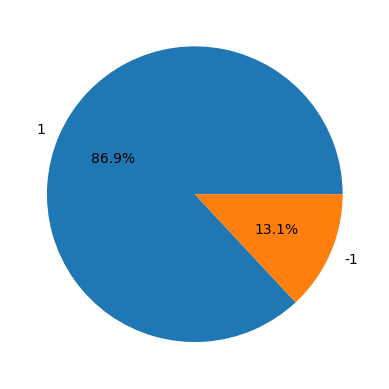

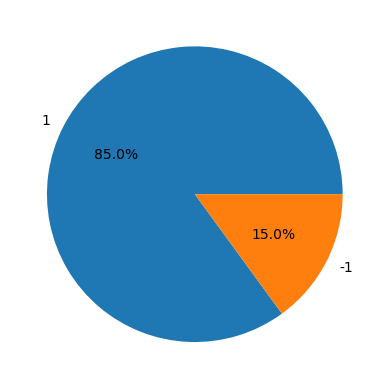

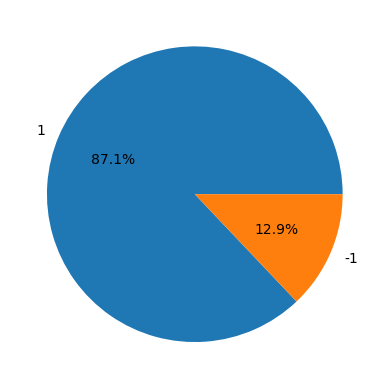

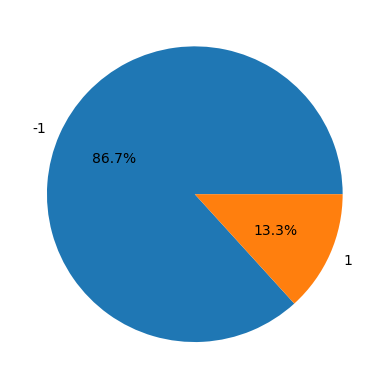

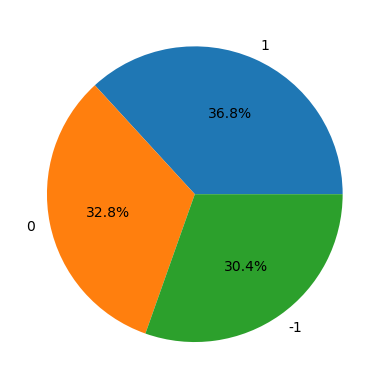

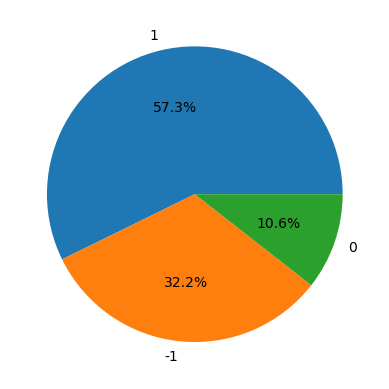

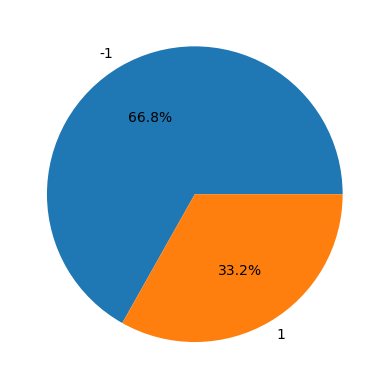

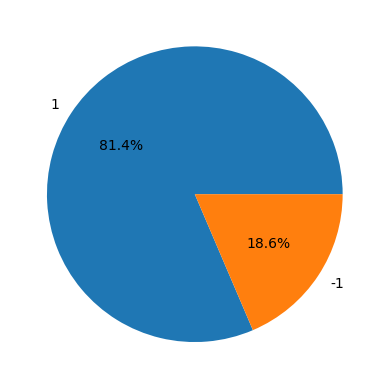

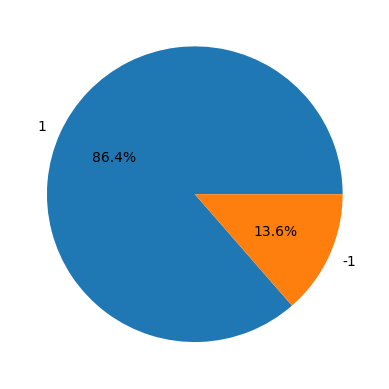

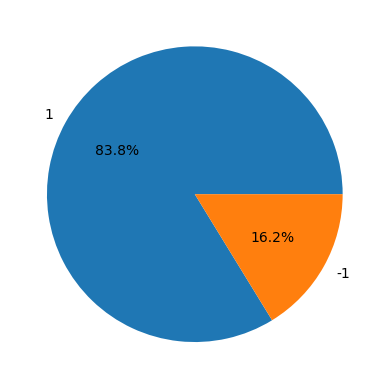

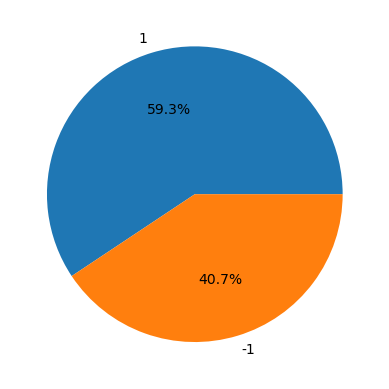

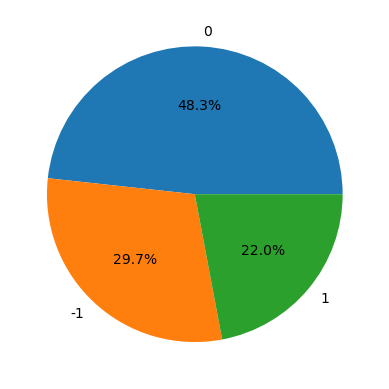

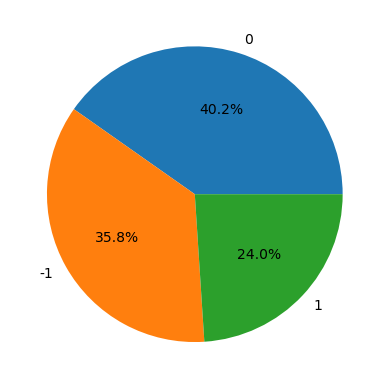

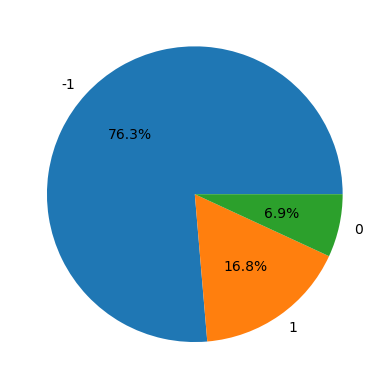

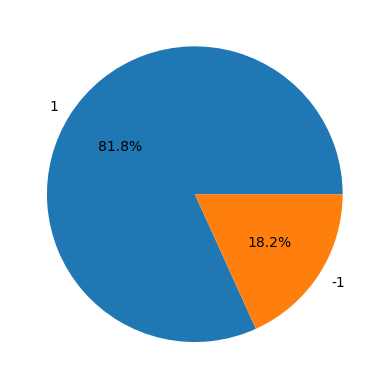

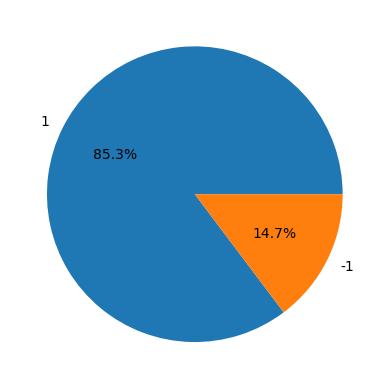

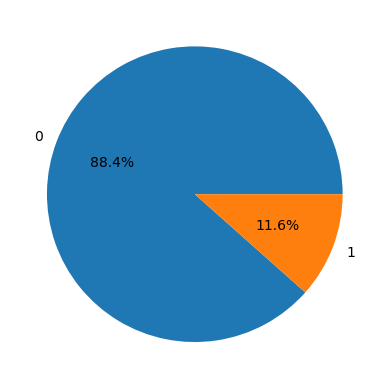

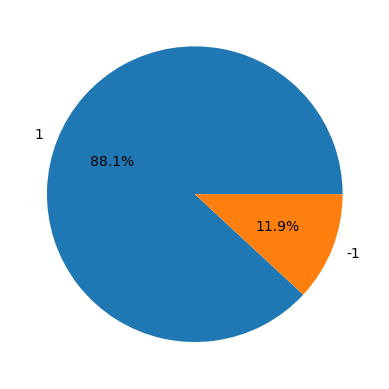

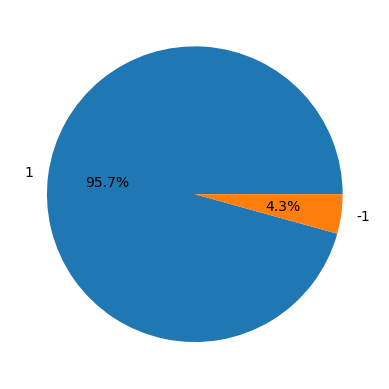

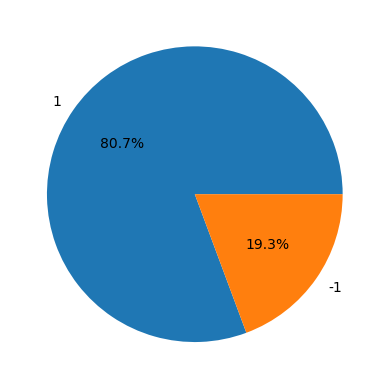

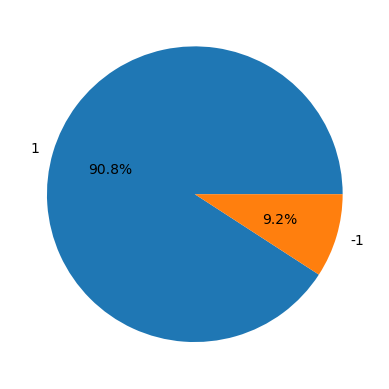

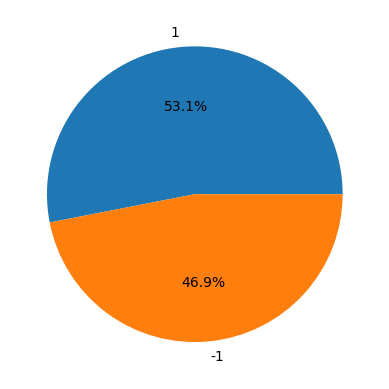

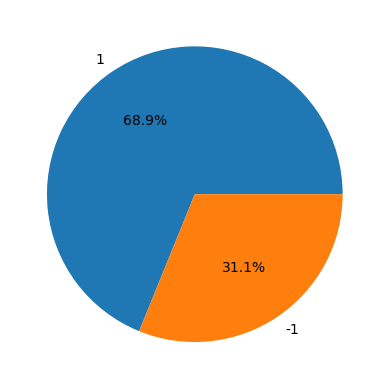

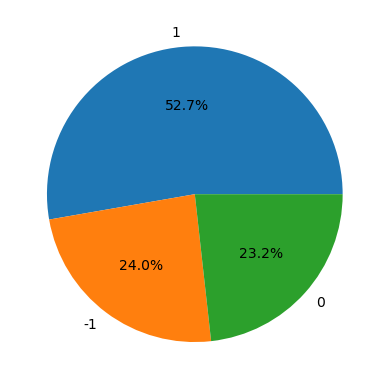

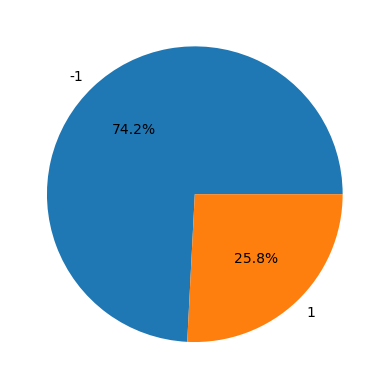

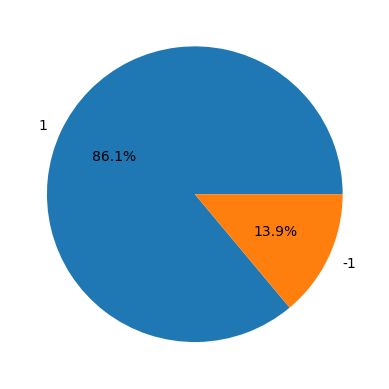

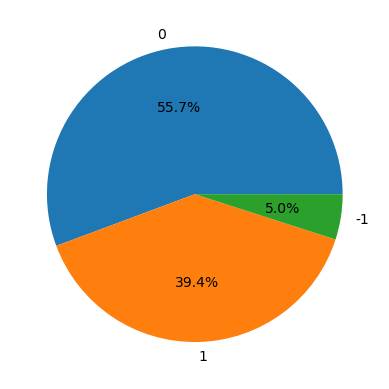

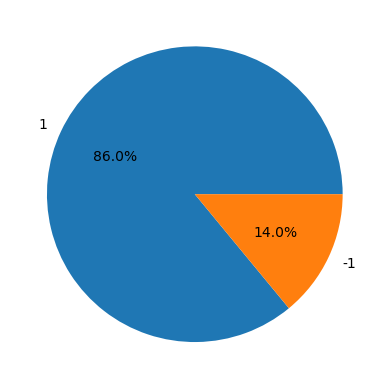

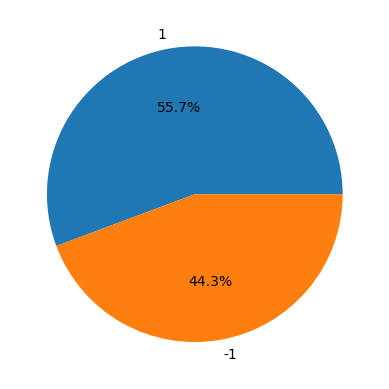

In [234]:
for feature in df.columns:
    labels_sizes = dict(df[feature].value_counts())
    labels = list(labels_sizes.keys())
    sizes = list(labels_sizes.values())
    plt.pie(sizes, labels=labels, autopct='%1.1f%%')
    plt.show()

In [235]:
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


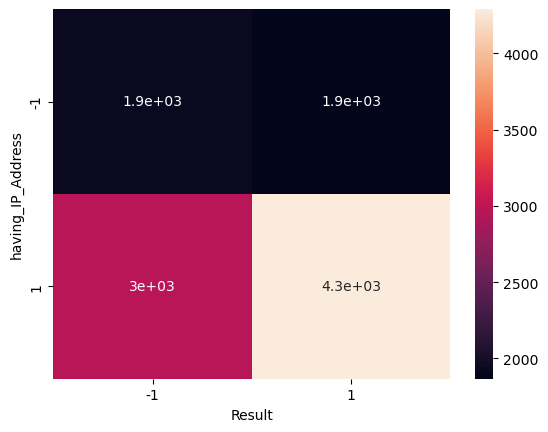

In [286]:
dff=pd.crosstab(df['having_IP_Address'], df['Result'])
sns.heatmap(dff, annot=True)
plt.show()

# Training

In [361]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC

In [349]:
clf = RandomForestClassifier(criterion='gini', verbose=1, n_estimators=100, random_state=1)
clf.fit(X_train, y_train)

C:\Users\840 G3\AppData\Local\Temp\ipykernel_6712\866921143.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished


RandomForestClassifier(random_state=1, verbose=1)

In [350]:
y_pred_test = clf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [351]:
clf.score(X_test,y_Test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


0.9692446856625961

In [352]:
accuracy_score(y_Test, y_pred_test)

0.9692446856625961

In [310]:
confusion_matrix(y_Test, y_pred_test)

array([[ 961,   53],
       [  18, 1179]], dtype=int64)

In [ ]:
### Adaboost

In [333]:
adaboost_classifier = AdaBoostClassifier(n_estimators=100, learning_rate=1, random_state=1, algorithm='SAMME.R') 

In [334]:
adaboost_classifier.fit(X_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(learning_rate=1, n_estimators=100, random_state=1)

In [335]:
y_pred = adaboost_classifier.predict(X_test)

In [336]:
accuracy_score(y_Test, y_pred)

0.9371325192220714

In [ ]:
### Decision Tree Classifier

In [357]:
decision_clf = DecisionTreeClassifier(splitter='random')

In [358]:
decision_clf.fit(X_train, y_train)

DecisionTreeClassifier(splitter='random')

In [359]:
y_pred_dec = decision_clf.predict(X_test)

In [360]:
accuracy_score(y_Test, y_pred_dec)

0.9624604251469923

In [ ]:
### SVM

In [462]:
svm_clf = SVC(C=3.0, verbose=True, random_state=0, kernel='poly', degree=9, coef0=0.3)

In [463]:
svm_clf.fit(X_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibSVM]

SVC(C=3.0, coef0=0.3, degree=9, kernel='poly', random_state=0, verbose=True)

In [464]:
y_predict_svm=svm_clf.predict(X_test)

In [465]:
accuracy_score(y_Test, y_predict_svm)

0.968340117593849

In [466]:
confusion_matrix(y_Test, y_predict_svm)

array([[ 963,   51],
       [  19, 1178]], dtype=int64)